<a href="https://colab.research.google.com/github/lourencocavalcante/Introduction-to-Data-Science/blob/main/INPE_CAP394_2022_Atv01_parte2_Lourenco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# **CAP-394 – Introdução à Ciência de Dados (2022)**

**Professores:**
*Dr. Rafael Duarte Coelho Dos Santos e Dr. Gilberto Ribeiro De Queiroz*

**Aluno :**
*Lourenço José Cavalcante Neto*

---

**ATIVIDADE 01:  Análise básica do Dataset**

**Descrição da Atividade:**

1. Preparar o primeiro notebook contendo uma análise básica dos dados, demonstrando:
  * A estrutura dos dados;
  * Visualização básica dos dados;
  * etc...


# **Importação das bibliotecas/pacotes necessários**

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import math
import calendar
import datetime

import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')


# **Dataset (Radiometro+Disdrometro)**

Os Dados são de dois equipamentos instalados próximo à torre ATTO, em um sítio chamado Campina, na região amazônica. 
*   **Radiômetro de microondas MP3000A:** Este mede diversas variáveis( Ambiente, Radiância no espectro de onda do microonda em diversos canais e Estimativas de parâmetros de nuvens)
*   **Disdrômetro RD80 (Joss):** Mede adistribuição das gotas de chuva que chegam à superfície;


In [ ]:
!pip install --upgrade gdown

In [ ]:
#Vamos baixar os dados do Google Drive para o Notebook

!gdown --id 1DflICrG3vlewOXnLYrsEqhK0WFn2Bz0U #Down. WD_campina_report_RZLwcDmDtNdrop_b2.1_report
!gdown --id 1HF3z0QjMhbOMMzvzhGLHmVHg0D6GQx5d #Down. level1_output_sfc
!gdown --id 1exlLcdlPzLOPhzC9l97TNlMnysEH0AWk #Down. level1_output_bt
!gdown --id 1suHWSYCt_3066gmPylMU9un9owYI3yVD #Down. level2_output_cld_atto
 

**Vamos abrir os dados e criar os dataframes**

In [3]:
#abrindo os dados e criando os Dataframes

#Dados do disdrômetro RD80. Chamado comumente de Joss. 
#Este equipamento mede adistribuição das gotas de chuva que chegam à superfície. (df_rd80_joss)
df_rd80_joss = pd.read_table('./JWD_campina_report_RZLwcDmDtNdrop_b2.1_report.txt',header=None,delim_whitespace=True)

#Dados do radiômetro de microondas MP3000A. Esse instrumento mede diversas variáveis:

#Variáveis de ambiente (dados_ambi_superficie)
df_mp3000A_1 = pd.read_table('./level1_output_sfc.txt',header=None,delim_whitespace=True)

#Radiância no espectro de onda do microonda em diversos canais (dados_med_canais_micro)
df_mp3000A_2 = pd.read_table('./level1_output_bt.txt',header=None,delim_whitespace=True)

#Estimativas de parâmetros de nuvens (dados_est_param_nuvens)
df_mp3000A_3 = pd.read_table('./level2_output_cld_atto.txt',header=None,delim_whitespace=True)

In [5]:
list_datasets = [df_rd80_joss, df_mp3000A_1, df_mp3000A_2, df_mp3000A_3]

# **Entendendo os dados**

**Vamos verificar o tamanho dos Datasets e visualizar as suas colunas**

In [6]:
#Tamanho dos Datasets
print('TAMANHO:\n')
for item in list_datasets:
  print('Tamanho do dataset: ',item.shape[0], ', quantiade de atributos: ', item.shape[1])

TAMANHO:

Tamanho do dataset:  315420 , quantiade de atributos:  31
Tamanho do dataset:  639828 , quantiade de atributos:  12
Tamanho do dataset:  639694 , quantiade de atributos:  29
Tamanho do dataset:  639542 , quantiade de atributos:  10


Agora vamos investigar os tipos de dados que de cada coluna:

In [7]:
for itemDtypes in list_datasets:
  print(itemDtypes.dtypes,'\n')

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
dtype: object 

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
dtype: object 

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12     object
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26

**Visualização rápida dos dados**

In [143]:
#Vamos visualizar as primeiras 5 e últimas 5 linhas dos dados
df_rd80_joss.head().append(df_rd80_joss.tail())

,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,Mean_weight_diameter_mm,Time_integration_s,Datetime
0,0.00000,0.00000,0.00000,0.00000,60.0,2020-03-17 13:52:00
1,0.00000,0.00000,0.00000,0.00000,60.0,2020-03-17 13:53:00
2,0.00000,0.00000,0.00000,0.00000,60.0,2020-03-17 13:54:00
3,0.00000,0.00000,0.00000,0.00000,60.0,2020-03-17 13:55:00
4,0.00000,0.00000,0.00000,0.00000,60.0,2020-03-17 13:56:00
315415,0.00321,0.06064,0.00059,0.37325,60.0,2022-06-29 09:05:00
315416,0.00409,0.08150,0.00074,0.38193,60.0,2022-06-29 09:06:00
315417,0.00558,0.12418,0.00095,0.40371,60.0,2022-06-29 09:07:00
315418,0.00497,0.10235,0.00088,0.38777,60.0,2022-06-29 09:08:00
315419,0.00000,0.00000,0.00000,0.00000,60.0,2022-06-29 09:09:00


In [144]:
#Vamos visualizar as primeiras 5 e últimas 5 linhas dos dados
df_mp3000A_1.head().append(df_mp3000A_1.tail())

,Tamb_K,Rh_percent,Pres_mb,Tir_K,DataQuality,Datetime
0,294.66,59.58,1007.91,300.24,1.0,2021-07-27 18:13:14
1,294.61,59.31,1008.01,300.23,1.0,2021-07-27 18:13:47
2,294.61,59.00,1007.91,300.08,1.0,2021-07-27 18:14:20
3,294.59,58.53,1008.01,300.39,1.0,2021-07-27 18:14:52
4,294.60,57.99,1008.01,300.22,1.0,2021-07-27 18:15:25
639823,296.85,96.99,1006.81,293.91,1.0,2022-06-01 09:17:47
639824,296.87,96.84,1006.81,294.12,1.0,2022-06-01 09:18:21
639825,296.92,97.02,1006.81,294.13,1.0,2022-06-01 09:18:54
639826,296.90,97.12,1006.81,294.07,1.0,2022-06-01 09:19:28
639827,296.90,97.12,1006.71,293.81,1.0,2022-06-01 09:20:02


In [145]:
#Vamos visualizar as primeiras 5 e últimas 5 linhas dos dados
df_mp3000A_2.head().append(df_mp3000A_2.tail())

,Ch_22_234,Ch_22_500,Ch_23_034,Ch_23_834,Ch_25_000,Ch_26_234,Ch_28_000,Ch_30_000,Ch_51_248,Ch_51_760,...,Ch_54_400,Ch_54_940,Ch_55_500,Ch_56_020,Ch_56_660,Ch_57_288,Ch_57_964,Ch_58_800,DataQuality,Datetime
0,299.553,298.792,299.311,299.058,299.195,298.717,300.119,297.972,299.893,299.326,...,300.143,299.012,299.483,299.548,299.959,299.148,299.191,297.988,1.0,2021-07-27 18:13:43
1,298.621,297.995,298.545,298.243,298.688,298.978,299.433,298.434,300.104,299.615,...,300.709,300.292,300.012,299.761,299.947,300.099,300.532,299.782,1.0,2021-07-27 18:14:16
2,298.661,298.165,298.656,298.803,298.744,298.661,299.563,298.369,299.862,299.522,...,299.355,299.336,299.576,299.548,300.128,300.154,300.136,299.668,1.0,2021-07-27 18:14:49
3,298.311,298.222,298.527,298.198,298.336,298.089,299.141,298.729,299.793,299.826,...,299.342,299.012,300.198,299.698,299.540,298.886,299.406,298.950,1.0,2021-07-27 18:15:22
4,298.477,298.240,298.745,298.681,298.516,298.735,299.286,299.509,299.589,299.788,...,299.608,300.736,300.437,299.300,299.938,299.248,300.069,299.175,1.0,2021-07-27 18:15:54
639689,65.358,63.766,55.962,51.186,31.646,15.541,9.856,-15.948,109.334,127.418,...,279.309,287.763,290.843,291.822,293.016,293.340,293.778,295.321,1.0,2022-06-01 09:17:44
639690,64.432,62.722,54.781,50.271,31.300,15.546,8.900,-7.416,108.785,126.053,...,278.690,287.683,290.743,291.571,292.022,292.444,292.558,292.945,1.0,2022-06-01 09:18:17
639691,64.936,63.554,55.201,50.706,31.902,15.903,9.573,-10.274,109.168,126.597,...,278.936,286.974,289.723,291.697,292.569,291.686,292.493,292.344,1.0,2022-06-01 09:18:51
639692,65.290,62.837,55.538,50.678,31.510,15.945,10.115,-41.143,109.342,126.393,...,279.318,287.624,290.941,290.921,292.366,291.882,293.362,293.898,1.0,2022-06-01 09:19:24
639693,64.701,63.214,55.056,50.426,31.092,15.345,9.257,-7.667,108.732,125.263,...,279.108,288.287,290.856,292.084,292.356,293.001,293.633,292.026,1.0,2022-06-01 09:19:57


In [146]:
#Vamos visualizar as primeiras 5 e últimas 5 linhas dos dados
df_mp3000A_3.head().append(df_mp3000A_3.tail())

,Int_Vapor_cm,Int_Liquid_mm,Cloud_Base_km,DataQuality,Datetime
0,11.642,19.680,0.00,1.0,2021-07-27 18:13:45
1,11.523,19.684,0.20,1.0,2021-07-27 18:14:18
2,11.544,19.686,0.20,1.0,2021-07-27 18:14:50
3,11.459,19.733,0.00,1.0,2021-07-27 18:15:23
4,11.461,19.722,0.20,1.0,2021-07-27 18:15:56
639537,4.498,0.000,0.05,1.0,2022-06-01 09:17:45
639538,4.161,0.000,0.00,1.0,2022-06-01 09:18:19
639539,4.299,0.000,0.00,1.0,2022-06-01 09:18:52
639540,5.400,0.000,0.00,1.0,2022-06-01 09:19:26
639541,4.176,0.000,0.00,1.0,2022-06-01 09:19:59


Como vimos, a colunas de dados não vieram com seus nomes. Vamos resolver isso adicionando nome para as colunas dos dados do instrumento **rd80**, de acordo comas especificações recebidas juntamente com os dados, executando a célula abaixo:

In [8]:
#Vamos adicionar os títulos das colunas:
df_rd80_joss.columns = ['Ano', 'Mes', 'dia', 'H', 'M', 'S','Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3','Liquid_watercontent_g_m3',
'Mean_weight_diameter_mm', 'Time_integration_s', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D']

df_mp3000A_1.columns = ['Mes', 'dia', 'Ano', 'H', 'M', 'S', 'Tamb_K', 'Rh_percent', 'Pres_mb', 'Tir_K', 'Rain', 'DataQuality']

df_mp3000A_2.columns = ['Mes', 'dia', 'Ano', 'H', 'M', 'S', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248', 'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848', 'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660', 'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'DataQuality']

df_mp3000A_3.columns = ['Mes', 'dia', 'Ano', 'H', 'M', 'S', 'Int_Vapor_cm','Int_Liquid_mm','Cloud_Base_km','DataQuality']

Aqui adicionamos a coluna **Datetime** para cada um dos **Dataframes**, com os dados de data e hora. Primeiramente vamos converter o tipo dos dados de data e hora para **(int)**, para que possamos manipulá-los na criação da coluna Datetime, e em seguida adicionaremos a coluna Datetime.

In [9]:
#Modificanto o tipo de dado para (int)
df_rd80_joss[['Ano', 'Mes', 'dia', 'H', 'M', 'S']] = df_rd80_joss[['Ano', 'Mes', 'dia', 'H', 'M', 'S']].astype(int)
df_mp3000A_1[['Mes', 'dia', 'Ano', 'H', 'M', 'S']] = df_mp3000A_1[['Mes', 'dia', 'Ano', 'H', 'M', 'S']].astype(int)
df_mp3000A_2[['Mes', 'dia', 'Ano', 'H', 'M', 'S']] = df_mp3000A_2[['Mes', 'dia', 'Ano', 'H', 'M', 'S']].astype(int)
df_mp3000A_3[['Mes', 'dia', 'Ano', 'H', 'M', 'S']] = df_mp3000A_3[['Mes', 'dia', 'Ano', 'H', 'M', 'S']].astype(int)

Adicionando a coluna Datetime.

In [18]:
#Adiciona a coluna Datetime ao Dataframe com os dados do RD80 (Joss)
df_rd80_joss['Datetime'] = df_rd80_joss[['Ano', 'Mes', 'dia', 'H', 'M', 'S']].apply(lambda row:
                    datetime.datetime(year=row['Ano'], month=row['Mes'],day=row['dia'], hour=row['H'], minute=row["M"], second=row["S"]),axis=1)

#Caso queiramos definir a coluna 'Datetime' como Índice
#df_rd80_joss = df_rd80_joss.set_index('Datetime')

In [ ]:
list_datasets_mp3000A = [df_mp3000A_1, df_mp3000A_2, df_mp3000A_3]

#Loop para percorrer a lista de Dataframes e realizar as manipulações com um único bloco de código.
for itemMP3000A in list_datasets_mp3000A:

  #Faz uma busca na coluna Ano e altera o ano de YY para YYYY
  itemMP3000A['Ano'][itemMP3000A['Ano'] < 2000] = itemMP3000A['Ano'] + 2000

  #Adiciona a coluna Datetime ao Dataframe da vez no Loop for
  itemMP3000A['Datetime'] = itemMP3000A[['Mes', 'dia', 'Ano', 'H', 'M', 'S']].apply(lambda row:
                    datetime.datetime(year=row['Ano'], month=row['Mes'],day=row['dia'], hour=row['H'], minute=row["M"], second=row["S"]),axis=1)
  
  #Caso queiramos definir a coluna 'Datetime' como Índice
  #itemMP3000A = itemMP3000A.set_index('Datetime')

Após os ajustes nas colunas dos Dataframes, podemos finalizar esta etapa removendo as colunas nas quais não iremos utilizar a partir daqui.

In [22]:
#Vamos remover as colunas que não iremos utilizar

df_rd80_joss = df_rd80_joss.drop(columns=['Mes', 'dia', 'Ano', 'H', 'M', 'S','N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D',
       'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D',
       'N_D', 'N_D', 'N_D'])

df_mp3000A_1 = df_mp3000A_1.drop(columns=['Mes', 'dia', 'Ano', 'H', 'M', 'S', 'Rain'])

df_mp3000A_2 = df_mp3000A_2.drop(columns=['Mes', 'dia', 'Ano', 'H', 'M', 'S'])

df_mp3000A_3 = df_mp3000A_3.drop(columns=['Mes', 'dia', 'Ano', 'H', 'M', 'S'])


Detectando e corrigindo os valores nulos (**NaN**)

In [11]:
df_rd80_joss.isna().sum()
df_rd80_joss = df_rd80_joss.fillna(0)
df_mp3000A_1 = df_mp3000A_1.fillna(0)
df_mp3000A_2 = df_mp3000A_2.fillna(0)
df_mp3000A_3 = df_mp3000A_3.fillna(0)

In [23]:
#Verificar se os valores nulos (NaN) foram corrigidos
list_datasets = [df_rd80_joss, df_mp3000A_1, df_mp3000A_2, df_mp3000A_3]
for itemDtypes in list_datasets:
  print(itemDtypes.isna().sum())

Rain_Intensity_mm_h           0
radar_reflectivity_1_mm6m3    0
Liquid_watercontent_g_m3      0
Mean_weight_diameter_mm       0
Time_integration_s            0
Datetime                      0
dtype: int64
Tamb_K         0
Rh_percent     0
Pres_mb        0
Tir_K          0
DataQuality    0
Datetime       0
dtype: int64
Ch_22_234      0
Ch_22_500      0
Ch_23_034      0
Ch_23_834      0
Ch_25_000      0
Ch_26_234      0
Ch_28_000      0
Ch_30_000      0
Ch_51_248      0
Ch_51_760      0
Ch_52_280      0
Ch_52_804      0
Ch_53_336      0
Ch_53_848      0
Ch_54_400      0
Ch_54_940      0
Ch_55_500      0
Ch_56_020      0
Ch_56_660      0
Ch_57_288      0
Ch_57_964      0
Ch_58_800      0
DataQuality    0
Datetime       0
dtype: int64
Int_Vapor_cm     0
Int_Liquid_mm    0
Cloud_Base_km    0
DataQuality      0
Datetime         0
dtype: int64


**Agora vamos juntar os Dataframes** com os dados do **RD80** e do **mp3000A**

In [25]:
df_MP3000A = pd.merge(df_mp3000A_1,df_mp3000A_2, how='outer', on = ['Datetime','DataQuality'])
df_MP3000A_final = pd.merge(df_MP3000A, df_mp3000A_3, how='outer', on = ['Datetime','DataQuality'])
df_MP3000A_RD80_final = pd.merge(df_rd80_joss, df_MP3000A_final, how='outer', on = ['Datetime'])

Após juntar os Dataframes, vamos realizar uma busca por valores nulos (NaN) e corrigi-los.

In [26]:
df_MP3000A_RD80_final.isna().sum()

Rain_Intensity_mm_h           1899407
radar_reflectivity_1_mm6m3    1899407
Liquid_watercontent_g_m3      1899407
Mean_weight_diameter_mm       1899407
Time_integration_s            1899407
Datetime                            0
Tamb_K                        1574999
Rh_percent                    1574999
Pres_mb                       1574999
Tir_K                         1574999
DataQuality                    295763
Ch_22_234                     1575133
Ch_22_500                     1575133
Ch_23_034                     1575133
Ch_23_834                     1575133
Ch_25_000                     1575133
Ch_26_234                     1575133
Ch_28_000                     1575133
Ch_30_000                     1575133
Ch_51_248                     1575133
Ch_51_760                     1575133
Ch_52_280                     1575133
Ch_52_804                     1575133
Ch_53_336                     1575133
Ch_53_848                     1575133
Ch_54_400                     1575133
Ch_54_940   

In [27]:
df_MP3000A_RD80_final = df_MP3000A_RD80_final.fillna(0)

In [28]:
df_MP3000A_RD80_final.isna().sum()

Rain_Intensity_mm_h           0
radar_reflectivity_1_mm6m3    0
Liquid_watercontent_g_m3      0
Mean_weight_diameter_mm       0
Time_integration_s            0
Datetime                      0
Tamb_K                        0
Rh_percent                    0
Pres_mb                       0
Tir_K                         0
DataQuality                   0
Ch_22_234                     0
Ch_22_500                     0
Ch_23_034                     0
Ch_23_834                     0
Ch_25_000                     0
Ch_26_234                     0
Ch_28_000                     0
Ch_30_000                     0
Ch_51_248                     0
Ch_51_760                     0
Ch_52_280                     0
Ch_52_804                     0
Ch_53_336                     0
Ch_53_848                     0
Ch_54_400                     0
Ch_54_940                     0
Ch_55_500                     0
Ch_56_020                     0
Ch_56_660                     0
Ch_57_288                     0
Ch_57_96

Verificando o tamanho do Dataset final

In [29]:
print('Tamanho do dataset: ',df_MP3000A_RD80_final.shape[0], ', quantiade de atributos: ', df_MP3000A_RD80_final.shape[1])

Tamanho do dataset:  2214827 , quantiade de atributos:  36


Vamos ajustar os dados referente ao Datetime, adicionando novas colunas, patra que possamos manipular durante os filtros na EDA.

In [33]:
#Vamos converter o "Datetime" em um objeto datetime para que seja mais fácil realizar outras manipulações
df_MP3000A_RD80_final['Datetime'] = df_MP3000A_RD80_final.Datetime.astype('datetime64')

# Criar uma coluna data
df_MP3000A_RD80_final['Date'] = df_MP3000A_RD80_final['Datetime'].dt.date

# Criar uma coluna ano
df_MP3000A_RD80_final['Year'] = df_MP3000A_RD80_final['Datetime'].dt.year

# Criar uma coluna mês
df_MP3000A_RD80_final['Month'] = df_MP3000A_RD80_final['Datetime'].dt.month
df_MP3000A_RD80_final['Month'] = df_MP3000A_RD80_final['Month'].apply(lambda x: calendar.month_abbr[x])

In [34]:
# Ordenando a coluna do mês do ano
df_MP3000A_RD80_final['Month'] = pd.Categorical(df_MP3000A_RD80_final['Month'], 
                                 categories= ['Jan','Feb','Mar','Apr','May','Jun', 'Jul',
                                             'Aug','Sep','Oct','Nov','Dec'],
                                              ordered = True)

In [35]:
# Criando uma coluna de dia da semana

df_MP3000A_RD80_final['Day_of_week'] = [d.day_name() for d in df_MP3000A_RD80_final['Datetime']]

In [45]:
# Ordenando a coluna do dia da semana

df_MP3000A_RD80_final['Day_of_week'] = pd.Categorical(df_MP3000A_RD80_final['Day_of_week'], 
                                 categories= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                                              ordered = True)

In [46]:
# Criando a coluna hora do dia

df_MP3000A_RD80_final['Time'] = [d.time() for d in df_MP3000A_RD80_final['Datetime']]

In [47]:
# Dividindo a coluna hora do dia em diferentes sessões em um dia

df_MP3000A_RD80_final=df_MP3000A_RD80_final.assign(session=pd.cut(df_MP3000A_RD80_final.Datetime.dt.hour,
                            [0,6,12,18,23],
                            labels=['Night','Morning','Afternoon','Evening'],
                            include_lowest=True))

In [48]:
df_MP3000A_RD80_final.columns

Index(['Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm',
       'Time_integration_s', 'Datetime', 'Tamb_K', 'Rh_percent', 'Pres_mb',
       'Tir_K', 'DataQuality', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034',
       'Ch_23_834', 'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000',
       'Ch_51_248', 'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336',
       'Ch_53_848', 'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020',
       'Ch_56_660', 'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'Int_Vapor_cm',
       'Int_Liquid_mm', 'Cloud_Base_km', 'Date', 'Year', 'Month',
       'Day_of_week', 'Time', 'session'],
      dtype='object')

**Visualização dos dados**

In [49]:
#Vamos visualizar as primeiras 5 e últimas 5 linhas dos dados
df_MP3000A_RD80_final.loc[df_MP3000A_RD80_final['Rain_Intensity_mm_h'] > 0].head(n=2).append(df_MP3000A_RD80_final.loc[df_MP3000A_RD80_final['DataQuality'] > 0].tail(n=2))

,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,Mean_weight_diameter_mm,Time_integration_s,Datetime,Tamb_K,Rh_percent,Pres_mb,Tir_K,...,Ch_58_800,Int_Vapor_cm,Int_Liquid_mm,Cloud_Base_km,Date,Year,Month,Day_of_week,Time,session
43,0.00676,0.15594,0.00112,0.41176,60.0,2020-03-17 14:35:00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,2020-03-17,2020,Mar,Tuesday,14:35:00,Afternoon
57,0.00498,0.10829,0.00086,0.39844,60.0,2020-03-17 14:49:00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,2020-03-17,2020,Mar,Tuesday,14:49:00,Afternoon
2214825,0.00000,0.00000,0.00000,0.00000,0.0,2022-06-01 09:19:26,0.0,0.0,0.0,0.0,...,0.0,5.400,0.0,0.0,2022-06-01,2022,Jun,Wednesday,09:19:26,Morning
2214826,0.00000,0.00000,0.00000,0.00000,0.0,2022-06-01 09:19:59,0.0,0.0,0.0,0.0,...,0.0,4.176,0.0,0.0,2022-06-01,2022,Jun,Wednesday,09:19:59,Morning


Para que as nossas análises nos dados ocorram como esperado, precisamos aplicar uma pequena normalização nos nossos dados. Vamos olhar os dados da coluna **Rain_Intensity_mm_h** e, onde o valos for menor que **0.1** será feita a substituição por **0 (zero**).

In [ ]:
df_MP3000A_RD80_final['Rain_Intensity_mm_h'][df_MP3000A_RD80_final['Rain_Intensity_mm_h'] < 0.1] = 0

**Visualização das estatísticas descritivas**

In [50]:
#Visualização das estatísticas descritivas
df_MP3000A_RD80_final.describe()

,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,Mean_weight_diameter_mm,Time_integration_s,Tamb_K,Rh_percent,Pres_mb,Tir_K,DataQuality,...,Ch_55_500,Ch_56_020,Ch_56_660,Ch_57_288,Ch_57_964,Ch_58_800,Int_Vapor_cm,Int_Liquid_mm,Cloud_Base_km,Year
count,2.214827e+06,2.214827e+06,2.214827e+06,2.214827e+06,2.214827e+06,2.214827e+06,2.214827e+06,2.214827e+06,2.214827e+06,2.214827e+06,...,2.214827e+06,2.214827e+06,2.214827e+06,2.214827e+06,2.214827e+06,2.214827e+06,2.214827e+06,2.214827e+06,2.214827e+06,2.214827e+06
mean,5.323068e-02,4.405721e+01,2.593942e-03,1.636192e-02,8.544776e+00,8.635434e+01,2.155010e+01,2.906979e+02,7.854729e+01,8.222240e-01,...,8.447392e+01,8.489540e+01,8.517493e+01,8.523859e+01,8.535263e+01,8.467229e+01,1.513062e+00,1.306966e-01,1.275800e+00,2.021536e+03
std,1.296635e+00,1.778729e+03,5.594104e-02,1.404468e-01,2.096839e+01,1.354988e+02,3.846639e+01,4.560916e+02,1.234777e+02,3.823241e-01,...,1.325568e+02,1.332185e+02,1.336573e+02,1.337576e+02,1.339366e+02,1.337527e+02,2.820893e+00,1.192385e+00,2.461232e+00,5.055956e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.700000e-01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,2.020000e+03
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.021000e+03
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.022000e+03
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.958100e+02,0.000000e+00,1.003810e+03,2.553100e+02,1.000000e+00,...,2.910800e+02,2.923930e+02,2.932880e+02,2.933830e+02,2.937670e+02,2.939770e+02,4.022000e+00,0.000000e+00,1.200000e+00,2.022000e+03
max,1.288954e+02,5.504862e+05,4.893830e+00,5.361310e+00,6.000000e+01,3.113100e+02,9.977000e+01,1.015610e+03,3.634400e+02,1.000000e+00,...,3.013550e+02,3.017440e+02,3.019350e+02,3.020880e+02,3.024370e+02,3.040740e+02,5.000000e+01,4.500000e+01,9.750000e+00,2.022000e+03


Após todos os ajustes anteriores, agora vamos exportar os nossos dados em um arquivo CSV para que possamos ter uma cópia e, caso necessário, podemos usá-lo para nossas análes.

In [ ]:
#Exportando o Dataframe para o formato CSV
df_MP3000A_RD80_final.to_csv('./df_MP3000A_RD80_final.csv')

# **Análise dos dados (EDA)**

In [120]:
#df_filter_MP3000A_RD80 = df_MP3000A_RD80_final.query("(Datetime >= '2020-03-1' and Datetime <='2022-07-30') and (Rain_Intensity_mm_h > 0 and DataQuality > 0)")
df_filter_MP3000A_RD80 = df_MP3000A_RD80_final.query("(Rain_Intensity_mm_h > 0 and DataQuality > 0)")

In [121]:
df_filter_MP3000A_RD80

,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,Mean_weight_diameter_mm,Time_integration_s,Datetime,Tamb_K,Rh_percent,Pres_mb,Tir_K,...,Ch_58_800,Int_Vapor_cm,Int_Liquid_mm,Cloud_Base_km,Date,Year,Month,Day_of_week,Time,session
13683,1.19429,597.16241,0.06519,1.45805,60.0,2021-08-05 11:23:00,0.00,0.00,0.00,0.00,...,0.000,5.469,1.694,1.3,2021-08-05,2021,Aug,Thursday,11:23:00,Morning
13688,1.30597,569.00922,0.07153,1.44561,60.0,2021-08-05 11:28:00,0.00,0.00,0.00,0.00,...,0.000,5.285,0.758,2.0,2021-08-05,2021,Aug,Thursday,11:28:00,Morning
13693,0.47979,213.50414,0.02749,1.37457,60.0,2021-08-05 11:33:00,0.00,0.00,0.00,0.00,...,0.000,5.017,0.567,2.0,2021-08-05,2021,Aug,Thursday,11:33:00,Morning
15017,0.24632,26.14197,0.02150,0.78884,60.0,2021-08-15 15:08:00,0.00,0.00,0.00,0.00,...,295.925,0.000,0.000,0.0,2021-08-15,2021,Aug,Sunday,15:08:00,Afternoon
15022,0.26386,46.79322,0.01990,0.94988,60.0,2021-08-15 15:13:00,0.00,0.00,0.00,0.00,...,0.000,5.140,4.992,1.2,2021-08-15,2021,Aug,Sunday,15:13:00,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278497,6.08211,2978.80371,0.30238,1.62014,60.0,2022-05-31 17:40:00,301.50,84.16,1003.91,292.65,...,0.000,0.000,0.000,0.0,2022-05-31,2022,May,Tuesday,17:40:00,Afternoon
278502,5.52877,1931.53613,0.31949,1.32428,60.0,2022-05-31 17:45:00,300.17,96.81,1003.91,295.12,...,0.000,0.000,0.000,0.0,2022-05-31,2022,May,Tuesday,17:45:00,Afternoon
278678,9.89920,3345.32812,0.54928,1.37862,60.0,2022-05-31 20:41:00,0.00,0.00,0.00,0.00,...,294.991,0.000,0.000,0.0,2022-05-31,2022,May,Tuesday,20:41:00,Evening
278683,32.38485,52984.63281,1.31300,2.41154,60.0,2022-05-31 20:46:00,0.00,0.00,0.00,0.00,...,0.000,11.264,15.020,0.0,2022-05-31,2022,May,Tuesday,20:46:00,Evening


**Vamos visualizar as correlações entre as variáveis do Dataset**

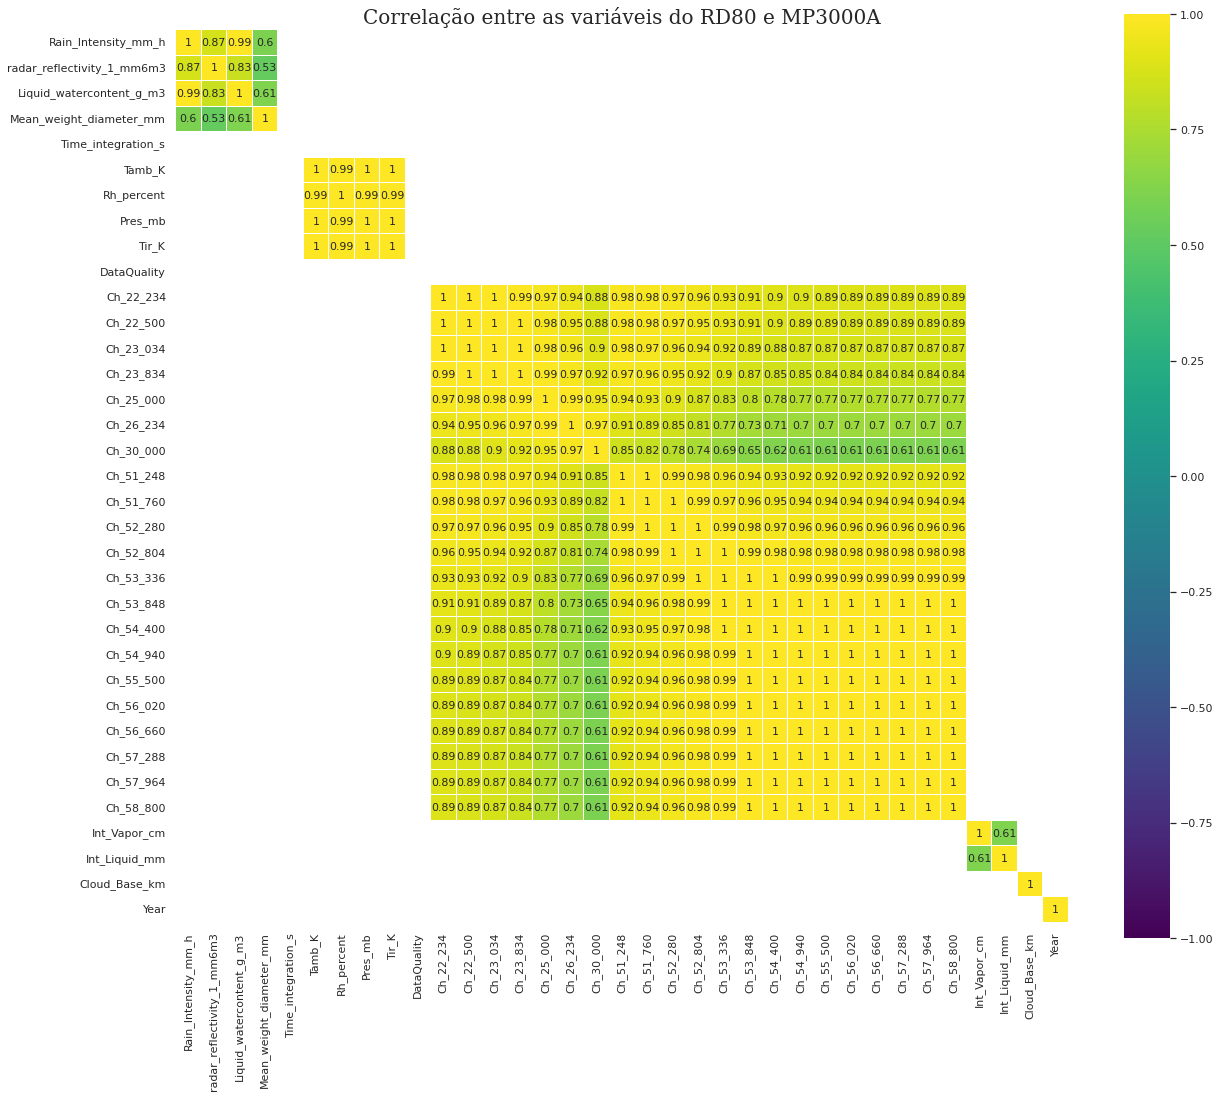

In [122]:
corr = df_filter_MP3000A_RD80.corr()
plt.figure(figsize=(20, 17))
plt.title('Correlação entre as variáveis do RD80 e MP3000A', fontsize=20, fontfamily='serif')
sns.heatmap(corr[(corr >= 0.50) | (corr <= -0.50)],cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 11}, square=True);

In [ ]:
'''def convert_k_c(info):
  temperatura = (info-273)
  return temperatura'''

#df_filter_MP3000A_RD80['Tamb_K'][df_MP3000A_RD80_final['Rain_Intensity_mm_h'] != 0] = (df_filter_MP3000A_RD80['Tamb_K']/100.)-273.15


Vamos visualizar o acumulado da intensidade da chuva para todo o período dos dados, olhando apenas os registros de chuva, usando como referência a variável Rain_Intensity_mm_h.

In [1]:
#Plotando o acumulado da intensidade da chuva por horário do dia
df_filter1_MP3000A_RD80 = df_MP3000A_RD80_final.query("(Rain_Intensity_mm_h > 0 and DataQuality > 0)")

ax = plt.gca()
plt.rcParams["figure.figsize"] = [15,6]
df_filter1_MP3000A_RD80.plot(kind="line",x="Date",y="Rain_Intensity_mm_h",label='Intensidade de chuva (mm/h)', ax=ax)
df_filter1_MP3000A_RD80.plot(kind='line',x='Date',y="Int_Liquid_mm", label='Conteúdo de água líquida integrado na nuvem (mm)', ax=ax)

NameError: ignored

Vamos visualizar o acumulado da intensidade da chuva no período de **Janeiro** a **Julho/2022**.

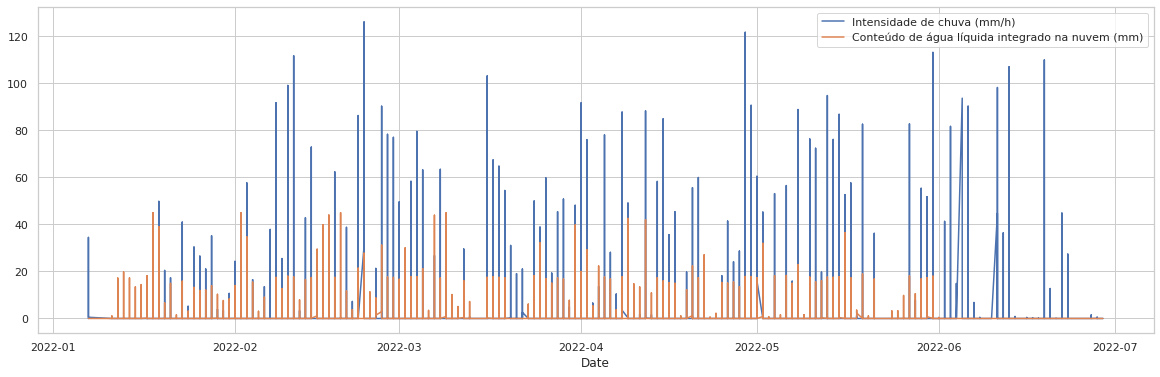

In [142]:
#Plotando o acumulado da intensidade da chuva por horário do dia
df_filter_MP3000A_RD80 = df_MP3000A_RD80_final.query("(Datetime >= '2022-01-01')")

ax = plt.gca()
plt.rcParams["figure.figsize"] = [15,6]
df_filter_MP3000A_RD80.plot(kind="line",x="Date",y="Rain_Intensity_mm_h",label='Intensidade de chuva (mm/h)', ax=ax)
df_filter_MP3000A_RD80.plot(kind='line',x='Date',y="Int_Liquid_mm", label='Conteúdo de água líquida integrado na nuvem (mm)', ax=ax)

Agora vamos plotar a série temporal da intensidade das chuvas, separando os dados por períodos do dia: Night, Morning, Afternoon e Evening (Noite, Manhã, Tarde e Começo da noite).

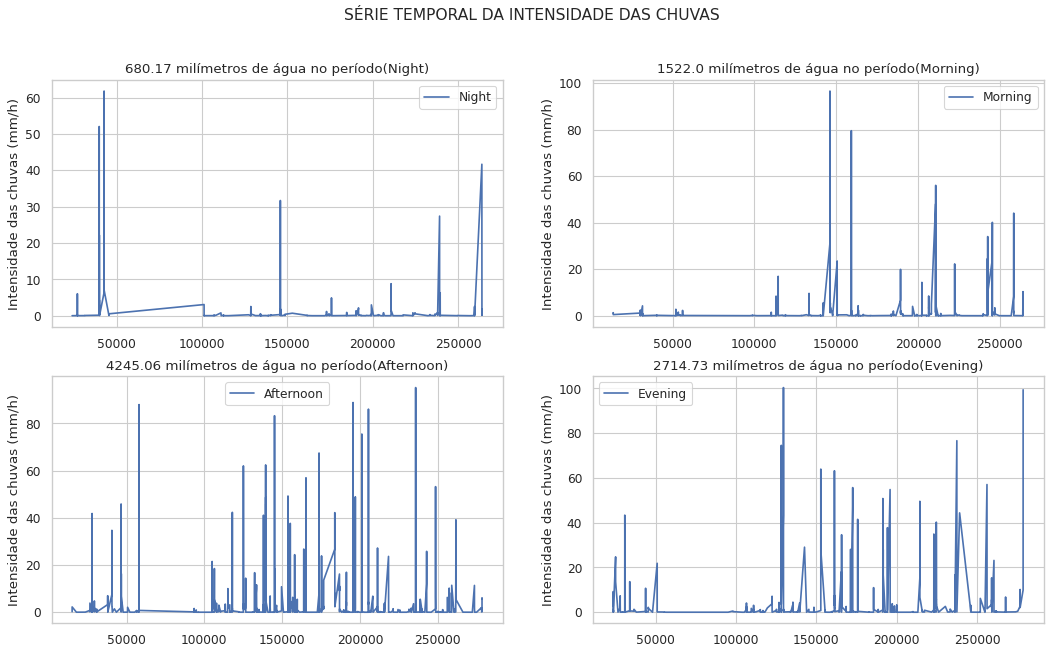

In [59]:
labels=['Night','Morning','Afternoon','Evening']

figure(figsize=(16,9),dpi=80)
plt.suptitle('SÉRIE TEMPORAL DA INTENSIDADE DAS CHUVAS', size=14)
for res in range(0,4):
    tot = round(df_filter_MP3000A_RD80.Rain_Intensity_mm_h.loc[df_filter_MP3000A_RD80.session == labels[res]].sum(),2)
    plt.subplot(2,2,res+1)
    plt.title(str(tot)+' milímetros de água no período('+labels[res]+')')
    #plt.xlabel("")
    plt.ylabel("Intensidade das chuvas (mm/h)")
    plt.plot(df_filter_MP3000A_RD80.loc[df_filter_MP3000A_RD80.session == labels[res]]['Rain_Intensity_mm_h'], label=labels[res])
    plt.legend()
plt.show()

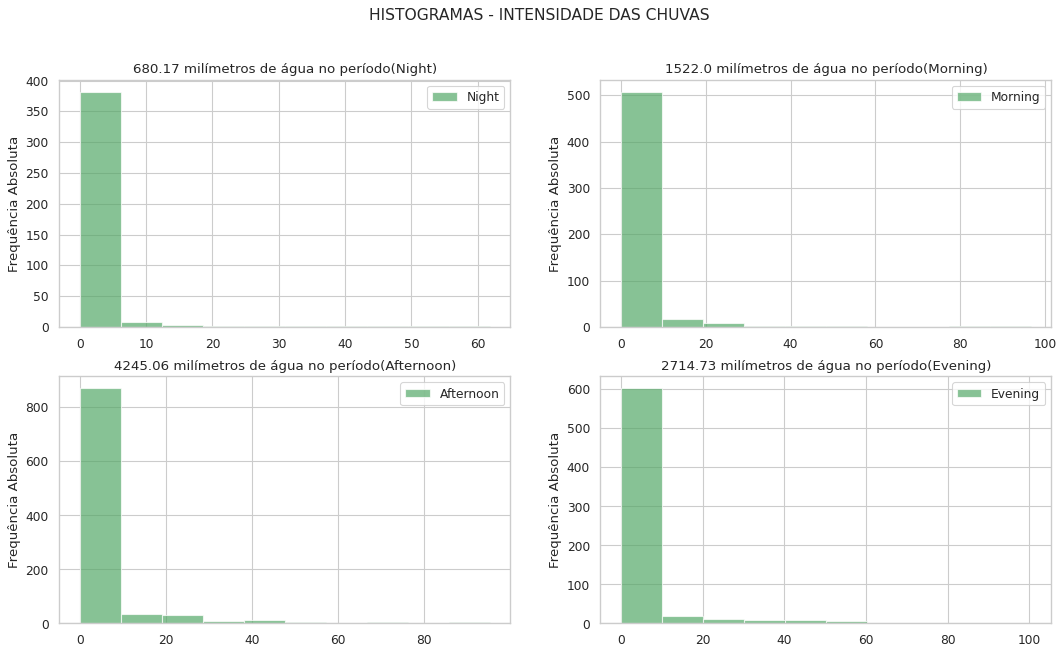

In [88]:
labels=['Night','Morning','Afternoon','Evening']

figure(figsize=(16,9),dpi=80)
plt.suptitle('HISTOGRAMAS - INTENSIDADE DAS CHUVAS', size=14)
for res in range(0,4):
    tot = round(df_filter_MP3000A_RD80.Rain_Intensity_mm_h.loc[df_filter_MP3000A_RD80.session == labels[res]].sum(),2)
    plt.subplot(2,2,res+1)
    plt.title(str(tot)+' milímetros de água no período('+labels[res]+')')
    #plt.xlabel("")
    plt.ylabel("Frequência Absoluta")
    plt.hist(df_filter_MP3000A_RD80.loc[df_filter_MP3000A_RD80.session == labels[res]]['Rain_Intensity_mm_h'], label=labels[res], color='g', alpha=0.7 )
    plt.legend()
plt.show()

Como podemos ver, os resultados dos gráficos acima nos levam a inferir que ocorreu uma maior intensidade de chuva no período da **tarde (Afternoon)** durante todo o período observado, chegando a uma Frequência Absoluta de mais de 800.

Agora vamos visualizar este dado de forma separada, executando o código da célula abaixo.

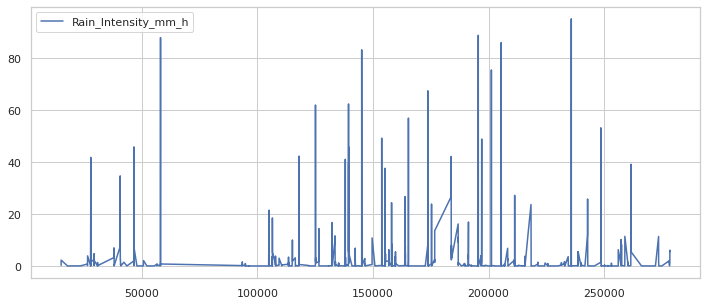

In [69]:
#Plotando o acumulado da intensidade da chuva do período da tarde (Afternoon)

plt.figure(figsize=(12, 5))
df_filter_MP3000A_RD80.loc[df_filter_MP3000A_RD80.session == 'Afternoon']['Rain_Intensity_mm_h'].plot(legend=True)

# **Considerações**

Como vimos, o período do dia em que apresentou a maior intensidade de chuva (acúmulo total no período observado) foi no horário da tarde (Afternoon).

Em desenvolvimento...

# **References**

ROSE, T.; CREWELL, S.; LÖHNERT, U.; SIMMER, C. A network suitable microwave radiometer for operational monitoring of the cloudy atmosphere, Atmos. Res., 75, 183–200, 2005.

Tukey, John (1977). Exploratory Data Analysis. Addison-Wesley Publishing Company.